In [1]:
# 기본 라이브러리
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt

# 딥러닝 라이브러리
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image

In [2]:
# 경로 설정
dataset_dir = r'D:/GitHub/CNN_Model/dataset'
original_dataset_dir = os.path.join(dataset_dir, 'training_set')
validation_dir = os.path.join(dataset_dir, 'validation_set')

# 서브 디렉토리 설정
train_cats_dir = os.path.join(original_dataset_dir, 'cats')
train_dogs_dir = os.path.join(original_dataset_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# validation 디렉토리 생성
os.makedirs(validation_cats_dir, exist_ok=True)
os.makedirs(validation_dogs_dir, exist_ok=True)

# validation에 사용할 이미지 수
num_val = 1000

# 파일 리스트
cat_fnames = [f for f in os.listdir(train_cats_dir)]
dog_fnames = [f for f in os.listdir(train_dogs_dir)]

random.seed(42)
random.shuffle(cat_fnames)
random.shuffle(dog_fnames)

# 고양이 validation 복사
for i, fname in enumerate(cat_fnames):
    if i < num_val:
        src = os.path.join(train_cats_dir, fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)

# 강아지 validation 복사
for i, fname in enumerate(dog_fnames):
    if i < num_val:
        src = os.path.join(train_dogs_dir, fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)

print('validation_set 생성 완료!')


validation_set 생성 완료!


In [3]:
# Generator 설정
train_dir = os.path.join(dataset_dir, 'training_set')
validation_dir = os.path.join(dataset_dir, 'validation_set')
test_dir = os.path.join(dataset_dir, 'test_set')

# 데이터 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# 제너레이터 생성
batch_size = 32
image_size = (150, 150)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
# CNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 모델 구조 출력
model.summary()

C:\Users\junju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 모델 컴파일
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [7]:
# 학습
epochs = 30

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 743ms/step - accuracy: 0.5113 - loss: 0.6909

C:\Users\junju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 205s 816ms/step - accuracy: 0.5114 - loss: 0.6909 - val_accuracy: 0.5585 - val_loss: 0.6750
Epoch 2/30
  1/250 ━━━━━━━━━━━━━━━━━━━━ 1:17 311ms/step - accuracy: 0.5312 - loss: 0.6749

C:\Users\junju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.5312 - loss: 0.6749 - val_accuracy: 0.5721 - val_loss: 0.6692
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 148s 591ms/step - accuracy: 0.5743 - loss: 0.6713 - val_accuracy: 0.5539 - val_loss: 0.6968
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6562 - loss: 0.6046 - val_accuracy: 0.5691 - val_loss: 0.6784
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 113s 452ms/step - accuracy: 0.5962 - loss: 0.6596 - val_accuracy: 0.6401 - val_loss: 0.6225
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7188 - loss: 0.5772 - val_accuracy: 0.6411 - val_loss: 0.6244
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 109s 436ms/step - accuracy: 0.6412 - loss: 0.6313 - val_accuracy: 0.6779 - val_loss: 0.5886
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7188 - loss: 0.5543 - val_accuracy: 0.6951 - val_loss: 0.5893
Epoch 9/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 115s 459ms/step - accuracy: 0.6661 - loss: 0.6112 - val_acc

C:\Users\junju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\junju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\junju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\junju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local

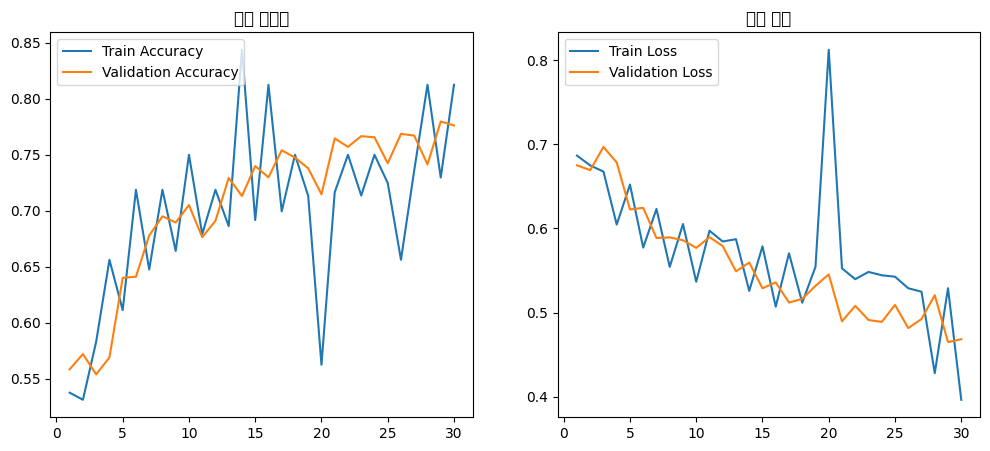

최종 검증 정확도: 0.7762, 최종 검증 손실: 0.4683


In [8]:
# 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('모델 정확도')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('모델 손실')
plt.legend()

plt.show()

# 최종 정확도 출력
final_val_acc = val_acc[-1]
final_val_loss = val_loss[-1]
print(f"최종 검증 정확도: {final_val_acc:.4f}, 최종 검증 손실: {final_val_loss:.4f}")

In [9]:
# 테스트할 이미지 경로
test_image_path = r'D:/GitHub/CNN_Model/example/cat.jpg'  # 예시

img = image.load_img(test_image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction < 0.5:
    print(f"모델 예측: 고양이 (확률: {1 - prediction[0][0]:.4f})")
else:
    print(f"모델 예측: 강아지 (확률: {prediction[0][0]:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
모델 예측: 고양이 (확률: 0.5873)
